In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing
Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Pneumonia_Project/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5216 files belonging to 2 classes.


## Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Pneumonia_Project/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16 files belonging to 2 classes.


## Building Model

In [6]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

## Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
163/163 [==============================] - 1516s 9s/step - loss: 0.3024 - accuracy: 0.8727 - val_loss: 0.8761 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 48s 283ms/step - loss: 0.1115 - accuracy: 0.9584 - val_loss: 0.5408 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 49s 284ms/step - loss: 0.0759 - accuracy: 0.9737 - val_loss: 0.4491 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 48s 280ms/step - loss: 0.0599 - accuracy: 0.9783 - val_loss: 0.8577 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 49s 284ms/step - loss: 0.0466 - accuracy: 0.9824 - val_loss: 0.3659 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 47s 279ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.1745 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 49s 285ms/step - loss: 0.0238 - accuracy: 0.9900 - val_loss: 0.0339 - val_acc

## Evaluating Model

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

163/163 [==============================] - 45s 264ms/step - loss: 0.0082 - accuracy: 0.9977
Training accuracy: 0.9976993799209595


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1/1 [==============================] - 0s 150ms/step - loss: 0.1041 - accuracy: 0.9375
Validation accuracy: 0.9375


## Saving Model

In [22]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
training_history.history #Return Dictionary of history

{'loss': [0.30237606167793274,
  0.11145345121622086,
  0.07593454420566559,
  0.05985966697335243,
  0.04656755551695824,
  0.035172123461961746,
  0.023846765980124474,
  0.027856770902872086,
  0.027111152186989784,
  0.019157936796545982],
 'accuracy': [0.8726993799209595,
  0.9583972096443176,
  0.9737346768379211,
  0.9783359169960022,
  0.9823619723320007,
  0.988113522529602,
  0.9900306463241577,
  0.988113522529602,
  0.9900306463241577,
  0.9930981397628784],
 'val_loss': [0.8760585784912109,
  0.5407654047012329,
  0.4491197466850281,
  0.8577448129653931,
  0.3659350872039795,
  0.17448338866233826,
  0.03385000303387642,
  0.54009610414505,
  0.007007172331213951,
  0.10412879288196564],
 'val_accuracy': [0.625,
  0.6875,
  0.6875,
  0.625,
  0.75,
  0.875,
  1.0,
  0.75,
  1.0,
  0.9375]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Validation set

In [26]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.75 %


## Accuracy Visualization

Training Visualization

In [27]:
#training_history.history['accuracy']

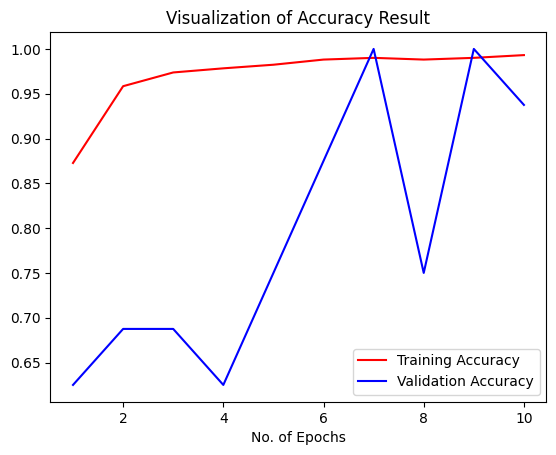

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Pneumonia_Project/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16 files belonging to 2 classes.


In [34]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

16/16 [==============================] - 1s 7ms/step


In [35]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [36]:
Y_true

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])>

In [37]:
predicted_categories

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      NORMAL       1.00      0.88      0.93         8
   PNEUMONIA       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



## Confusion Matrix Visualization

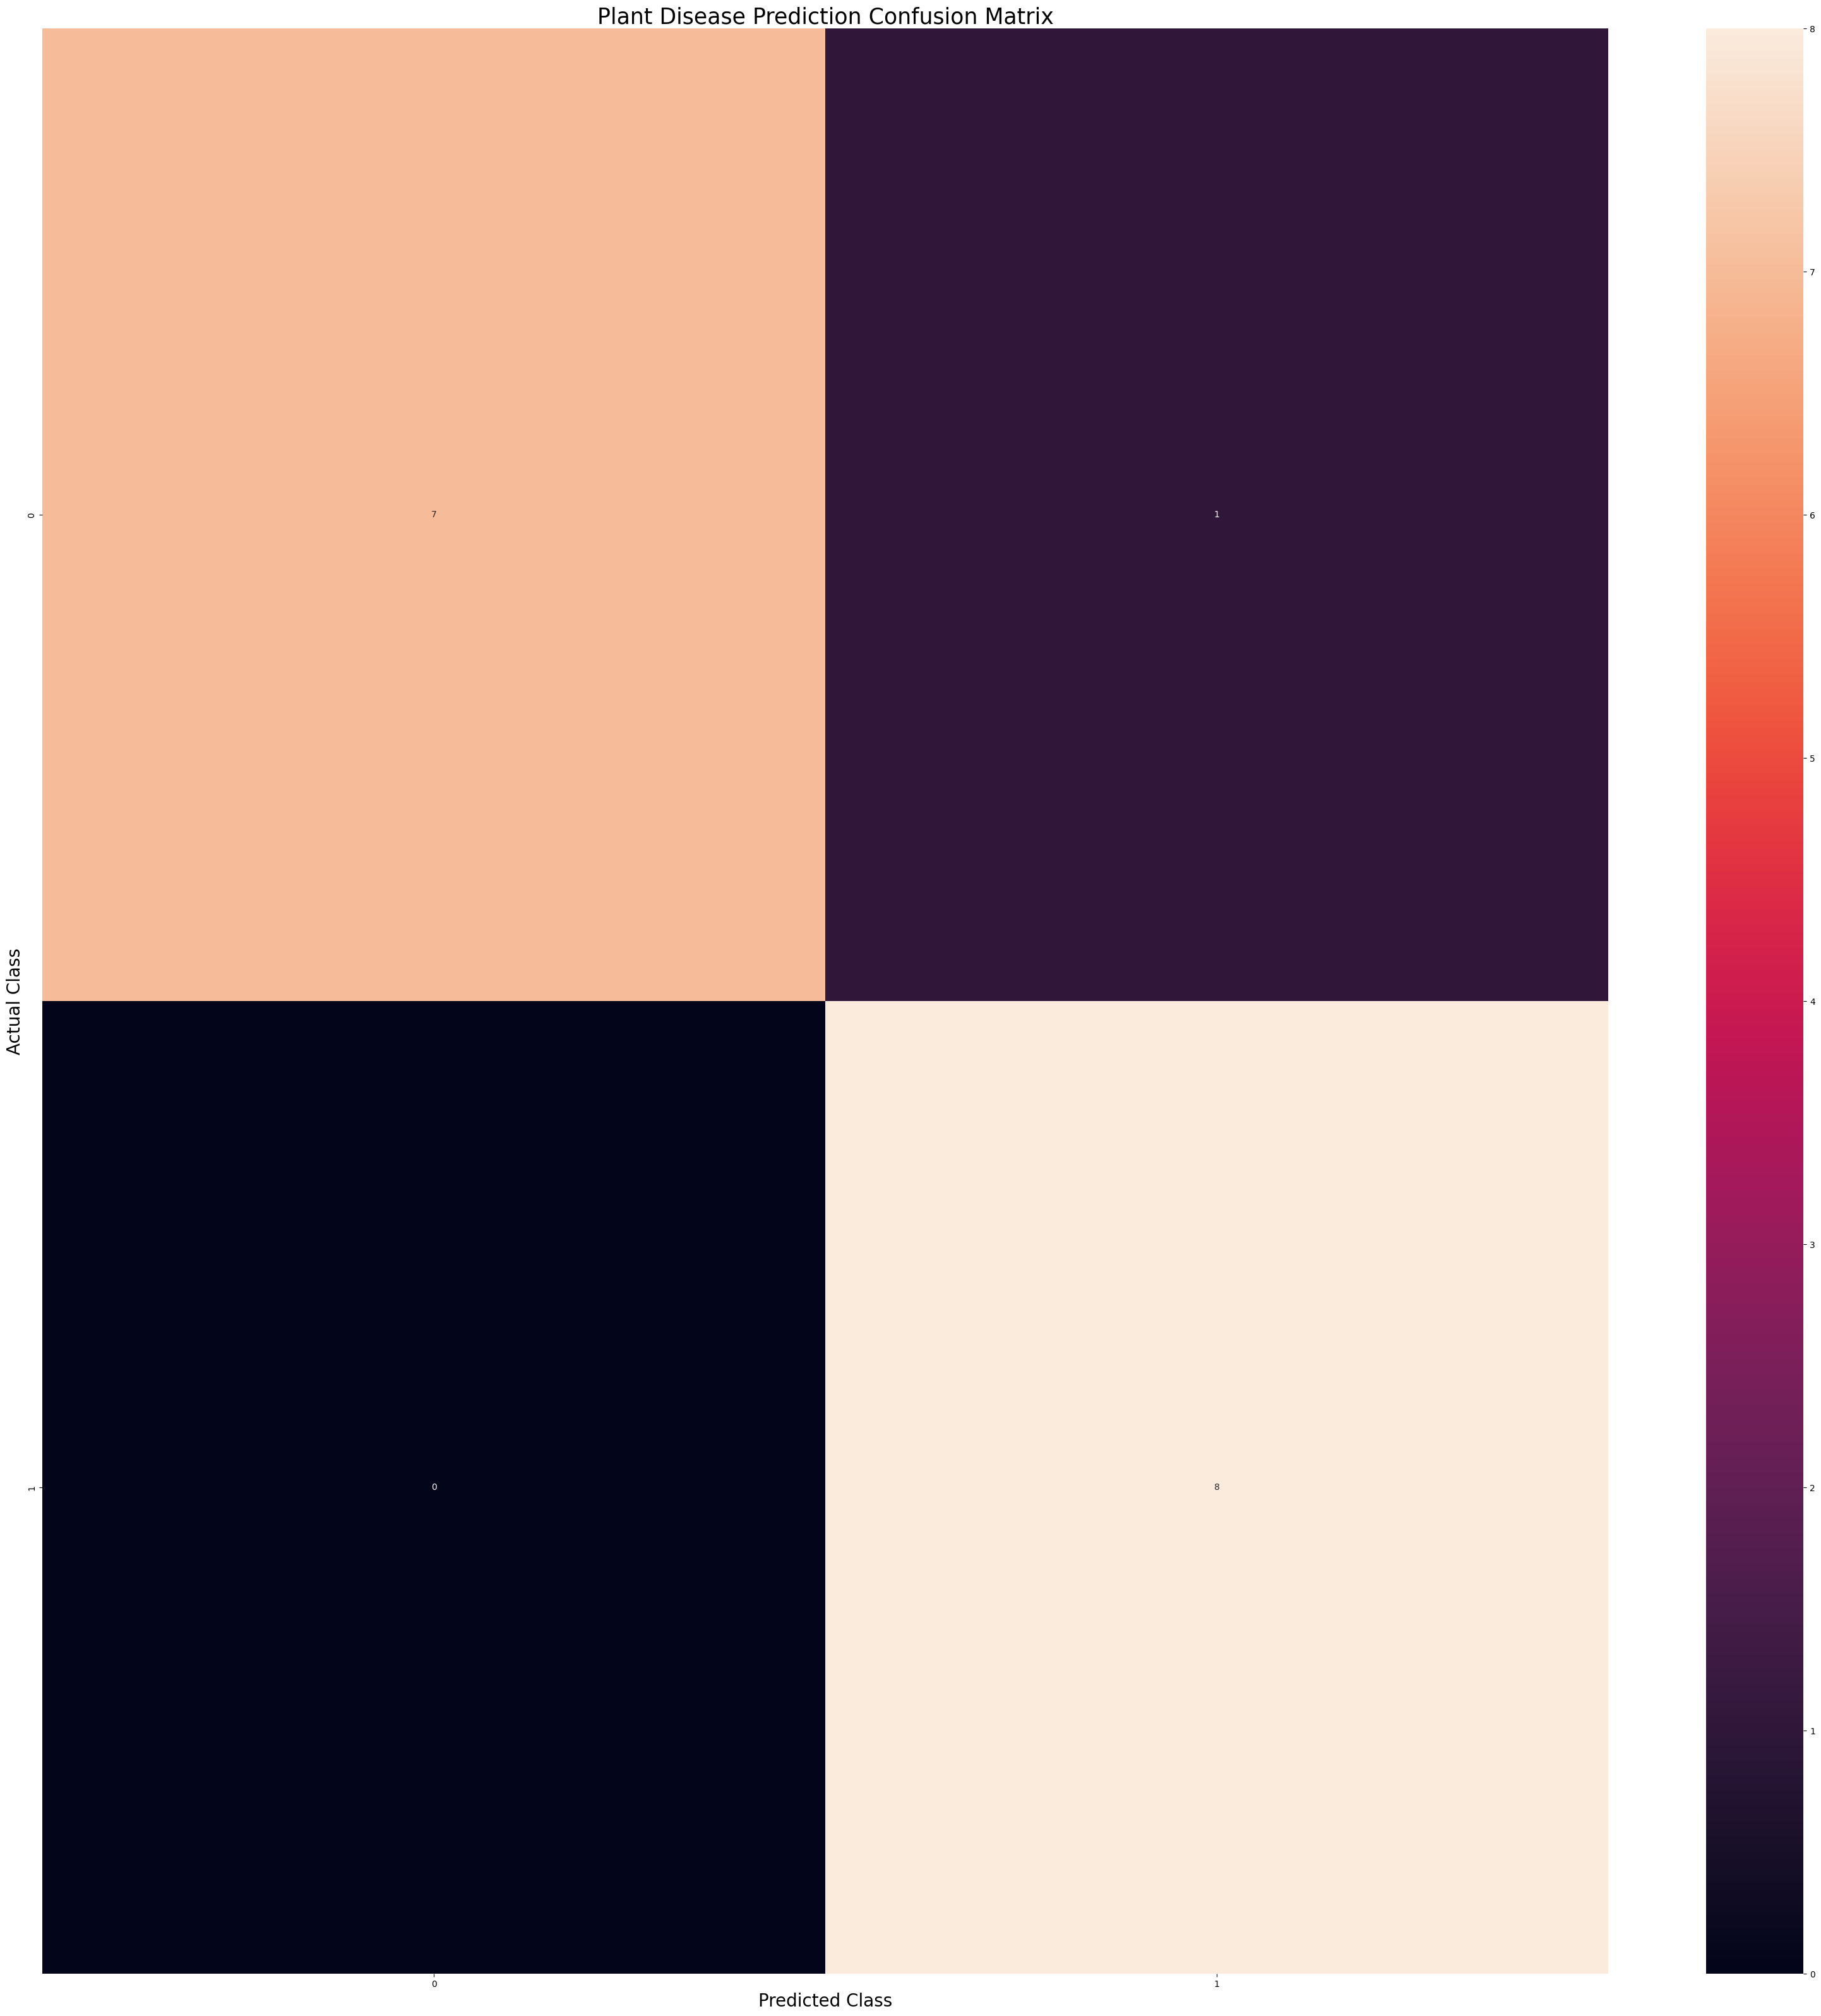

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()